In [16]:
#Import all required packages.

import os
os.environ['R_HOME']='/Library/Frameworks/R.framework/Resources' #The home for on your computer may differ. 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
import rpy2.robjects as ro
import rpy2.robjects.packages as rpackages
from rpy2.robjects import pandas2ri, StrVector
from rpy2.robjects.conversion import localconverter

The following block of code imports and cleans the data in the file 'study_1_data.csv'. 

In [2]:
#Import data and remove labels. 
data = pd.read_csv('study_1_data.csv')
data=data.drop(labels=0,axis=0) 
data=data.drop(labels=1,axis=0)

#Remove all data from participants who failed comprehension checks.
inclusions = []
for i in range(2,len(data)):
    if data.D_CompCheck[i] == 'Drol' or data.B_CompCheck[i] == 'Bricofly' or data.C_CompCheck[i] == 'Chapagite':
        inclusions = np.append(inclusions,[i])

exclusions = [x for x in np.arange(2,len(data)) if x not in inclusions]

data=data.drop(labels=exclusions,axis=0)

#Remove all data from participants who rated any of the poor causal claims positively. 
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropCompBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropHighBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropLowBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropCompBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropHighBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropLowBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropCompBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropHighBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropLowBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabCompBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabHighBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabLowBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabCompBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabHighBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabLowBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabCompBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabHighBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabLowBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropCompBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropHighBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropLowBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropCompBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropHighBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropLowBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropCompBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropHighBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropLowBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabCompBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabHighBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabLowBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabCompBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabHighBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabLowBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabCompBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabHighBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabLowBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropCompBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropHighBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropLowBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropCompBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropHighBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropLowBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropCompBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropHighBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropLowBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabCompBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabHighBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabLowBad70_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabCompBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabHighBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabLowBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabCompBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabHighBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabLowBad98_1 != s]
data = data.reset_index()

The following block of code defines the loss function.

In [3]:
def loss(x):
    marginal = [.01*.5+.7*.25+x*.25,1-(.01*.5+.7*.25+x*.25)] # defines a marginal distribution over the effect.
    int_probs_noncomp = [.01,.01,.7,x] #defines the conditional probability distribution of the effect for each possible intervention on the non-compressed description of the cause.
    int_dist_noncomp = [.25,.25,.25,.25] #defines the distribution over each possible intervention on the non-compressed description of the cause.
    kullback_lieblers_noncomp = [sum([marginal[0]*np.log2(marginal[0]/int_probs_noncomp[i]),marginal[1]*np.log2(marginal[1]/(1-int_probs_noncomp[i]))]) for i in range(0,4)] #computes the Kullback-Liebler divergence between the marginal distribution over the effect and distribution given each possible intervention on the non-compressed description of the cause.  
    int_probs_comp = [.01,(.7+x)/2] #computes the conditional probability distribution of the effect for each possible intervention on the compressed description of the cause.
    int_dist_comp = [.5,.5] #defines the distribution over each possible intervention on the compressed description of the cause.
    kullback_lieblers_comp = [sum([marginal[0]*np.log2(marginal[0]/int_probs_comp[i]),marginal[1]*np.log2(marginal[1]/(1-int_probs_comp[i]))]) for i in range(0,2)] #computes the Kullback-Liebler divergence between the marginal distribution over the effect and distribution given each possible intervention on the compressed description of the cause.
    return sum([int_dist_noncomp[i]*kullback_lieblers_noncomp[i] for i in range(0,4)])-sum([int_dist_comp[i]*kullback_lieblers_comp[i] for i in range(0,2)])


The following block constructs arrays whose values denote:

1. The vignette shown to each participant (vignette)
2. The information loss inherent in choosing a compressed over a non-compressed causal representation in the vignette shown to each participant (loss_vals)
3. Whether the participant was shown a vignette in which compression involved coarsening a causal variable or eliding a background variable (condition).
4. The participant's evaluation of the causal claim Compressed (comp_eval).
5. The participant's evaluation of the causal claim High (high_eval).
6. The participant's evaluation of the causal claim Low (low_eval).
7. The difference between the participant's evaluation of the causal claim Compressed and the causal claim High (comp_high_diff).
8. The difference between the participant's evaluation of the causal claim Compressed and the uniform avgerage of the participant's evaluation of the claims High and Low (comp_avg_diff).
8. The difference between the evaluation of the causal claim High and the uniform avgerage of the participant's evaluation of the causal claim Low (high_low_diff).

In [4]:
vignette = []
for i in range(0,len(data)):
    if data.Vignette[i] == 'Bricofly':
        vignette = np.append(vignette,[-1])
    if data.Vignette[i] == 'Chapagite':
        vignette = np.append(vignette,[0])
    if data.Vignette[i] == 'Drol':
        vignette = np.append(vignette,[-1])
        
loss_vals = []
for i in range(0,len(data)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':
        loss_vals = np.append(loss_vals,[loss(.7)])
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':
        loss_vals = np.append(loss_vals,[loss(.85)])
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':
        loss_vals = np.append(loss_vals,[loss(.98)])
        
condition = []
for i in range(0,len(data)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Prop_Loss_2':
        condition = np.append(condition,[-1])
    if data.Group[i] == 'Stab_No_Loss' or data.Group[i] == 'Stab_Loss_1' or data.Group[i] == 'Stab_Loss_2':
        condition = np.append(condition,[1])
        
comp_eval = []
for i in range(0,len(data)):
    if data.Vignette[i] == 'Bricofly':
        if data.Group[i] == 'Prop_No_Loss':
            comp_eval = np.append(comp_eval,[int(data.B_PropCompGood70_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            comp_eval = np.append(comp_eval,[int(data.B_StabCompGood70_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            comp_eval = np.append(comp_eval,[int(data.B_PropCompGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            comp_eval = np.append(comp_eval,[int(data.B_StabCompGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            comp_eval = np.append(comp_eval,[int(data.B_PropCompGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            comp_eval = np.append(comp_eval,[int(data.B_StabCompGood98_1[i])])
    if data.Vignette[i] == 'Chapagite':
        if data.Group[i] == 'Prop_No_Loss':
            comp_eval = np.append(comp_eval,[int(data.C_PropCompGood70_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            comp_eval = np.append(comp_eval,[int(data.C_StabCompGood70_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            comp_eval = np.append(comp_eval,[int(data.C_PropCompGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            comp_eval = np.append(comp_eval,[int(data.C_StabCompGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            comp_eval = np.append(comp_eval,[int(data.C_PropCompGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            comp_eval = np.append(comp_eval,[int(data.C_StabCompGood98_1[i])])
    if data.Vignette[i] == 'Drol':
        if data.Group[i] == 'Prop_No_Loss':
            comp_eval = np.append(comp_eval,[int(data.D_PropCompGood70_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            comp_eval = np.append(comp_eval,[int(data.D_StabCompGood70_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            comp_eval = np.append(comp_eval,[int(data.D_PropCompGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            comp_eval = np.append(comp_eval,[int(data.D_StabCompGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            comp_eval = np.append(comp_eval,[int(data.D_PropCompGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            comp_eval = np.append(comp_eval,[int(data.D_StabCompGood98_1[i])])

            
high_eval = []
for i in range(0,len(data)):
    if data.Vignette[i] == 'Bricofly':
        if data.Group[i] == 'Prop_No_Loss':
            high_eval = np.append(high_eval,[int(data.B_PropHighGood70_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            high_eval = np.append(high_eval,[int(data.B_StabHighGood70_1[i])])
        if data.Group[i] == 'Prop_Loss_1': 
            high_eval = np.append(high_eval,[int(data.B_PropHighGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            high_eval = np.append(high_eval,[int(data.B_StabHighGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            high_eval = np.append(high_eval,[int(data.B_PropHighGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            high_eval = np.append(high_eval,[int(data.B_StabHighGood98_1[i])])
    if data.Vignette[i] == 'Chapagite':
        if data.Group[i] == 'Prop_No_Loss':
            high_eval = np.append(high_eval,[int(data.C_PropHighGood70_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            high_eval = np.append(high_eval,[int(data.C_StabHighGood70_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            high_eval = np.append(high_eval,[int(data.C_PropHighGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            high_eval = np.append(high_eval,[int(data.C_StabHighGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            high_eval = np.append(high_eval,[int(data.C_PropHighGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            high_eval = np.append(high_eval,[int(data.C_StabHighGood98_1[i])])
    if data.Vignette[i] == 'Drol':
        if data.Group[i] == 'Prop_No_Loss':
            high_eval = np.append(high_eval,[int(data.D_PropHighGood70_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            high_eval = np.append(high_eval,[int(data.D_StabHighGood70_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            high_eval = np.append(high_eval,[int(data.D_PropHighGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            high_eval = np.append(high_eval,[int(data.D_StabHighGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            high_eval = np.append(high_eval,[int(data.D_PropHighGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            high_eval = np.append(high_eval,[int(data.D_StabHighGood98_1[i])])

low_eval = []
for i in range(0,len(data)):
    if data.Vignette[i] == 'Bricofly':
        if data.Group[i] == 'Prop_No_Loss':
            low_eval = np.append(low_eval,[int(data.B_PropLowGood70_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            low_eval = np.append(low_eval,[int(data.B_StabLowGood70_1[i])])
        if data.Group[i] == 'Prop_Loss_1': 
            low_eval = np.append(low_eval,[int(data.B_PropLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            low_eval = np.append(low_eval,[int(data.B_StabLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            low_eval = np.append(low_eval,[int(data.B_PropLowGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            low_eval = np.append(low_eval,[int(data.B_StabLowGood98_1[i])])
    if data.Vignette[i] == 'Chapagite':
        if data.Group[i] == 'Prop_No_Loss':
            low_eval = np.append(low_eval,[int(data.C_PropLowGood70_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            low_eval = np.append(low_eval,[int(data.C_StabLowGood70_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            low_eval = np.append(low_eval,[int(data.C_PropLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            low_eval = np.append(low_eval,[int(data.C_StabLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            low_eval = np.append(low_eval,[int(data.C_PropLowGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            low_eval = np.append(low_eval,[int(data.C_StabLowGood98_1[i])])
    if data.Vignette[i] == 'Drol':
        if data.Group[i] == 'Prop_No_Loss':
            low_eval = np.append(low_eval,[int(data.D_PropLowGood70_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            low_eval = np.append(low_eval,[int(data.D_StabLowGood70_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            low_eval = np.append(low_eval,[int(data.D_PropLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            low_eval = np.append(low_eval,[int(data.D_StabLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            low_eval = np.append(low_eval,[int(data.D_PropLowGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            low_eval = np.append(low_eval,[int(data.D_StabLowGood98_1[i])])
            


comp_high_diff = comp_eval - high_eval
comp_avg_diff = comp_eval - [.5*high_eval[i]+.5*low_eval[i] for i in range(0,len(data))]
high_low_diff = high_eval - low_eval                               

The following block regresses the difference between the participant's evaluation of the causal claim Compressed and the causal claim High (the variable V-A in the paper) against the Vignette, Loss, Condition, and all interactions between the three independent variables.

In [5]:
arr = np.hstack((vignette.reshape(-1,1),condition.reshape(-1,1),loss_vals.reshape(-1,1),comp_high_diff.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Vignette', 'Condition', 'Loss', 'Comp_High_Diff'])
mod = smf.ols(formula='Comp_High_Diff ~ Vignette + Condition + Loss + Vignette:Condition + Vignette:Loss + Condition:Loss + Vignette:Condition:Loss', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Comp_High_Diff   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     5.878
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           1.53e-06
Time:                        16:57:01   Log-Likelihood:                -829.89
No. Observations:                 450   AIC:                             1676.
Df Residuals:                     442   BIC:                             1709.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

The following block regresses the difference between the participant's evaluation of the causal claim Compressed and the average of their evaluations of causal claims High and Low (the variable V-B in the paper) against the Vignette, Loss, Condition, and all interactions between the three independent variables.

In [6]:
arr = np.hstack((vignette.reshape(-1,1),condition.reshape(-1,1),loss_vals.reshape(-1,1),comp_avg_diff.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Vignette', 'Condition', 'Loss', 'Comp_Avg_Diff'])
mod = smf.ols(formula='Comp_Avg_Diff ~ Vignette + Condition + Loss + Vignette:Condition + Vignette:Loss + Condition:Loss + Vignette:Condition:Loss', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          Comp_Avg_Diff   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     3.003
Date:                Fri, 21 Jan 2022   Prob (F-statistic):            0.00432
Time:                        16:57:01   Log-Likelihood:                -818.60
No. Observations:                 450   AIC:                             1653.
Df Residuals:                     442   BIC:                             1686.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

The following block regresses the difference between the participant's evaluation of the causal claims High and Low (the variable V-C in the paper) against the Vignette, Loss, Condition, and all interactions between the three independent variables.

In [7]:
arr = np.hstack((vignette.reshape(-1,1),condition.reshape(-1,1),loss_vals.reshape(-1,1),high_low_diff.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Vignette', 'Condition', 'Loss', 'High_Low_Diff'])
mod = smf.ols(formula='High_Low_Diff ~ Vignette + Condition + Loss + Vignette:Condition + Vignette:Loss + Condition:Loss + Vignette:Condition:Loss', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          High_Low_Diff   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     7.808
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           6.33e-09
Time:                        16:57:01   Log-Likelihood:                -665.39
No. Observations:                 450   AIC:                             1347.
Df Residuals:                     442   BIC:                             1380.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

The following block generates Figure 1.

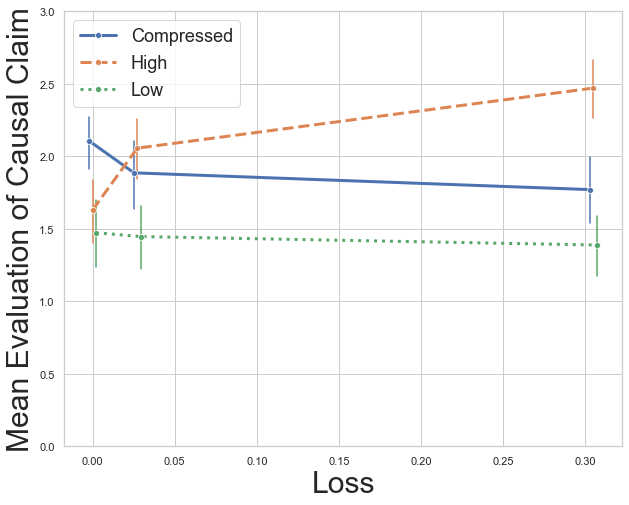

In [8]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.set_style("whitegrid")
ax = sns.lineplot(x=loss_vals-.002, y=comp_eval, marker='o', err_style='bars',ci=95,label="Compressed",linewidth=3)
ax = sns.lineplot(x=loss_vals, y=high_eval, marker='o', err_style='bars',ci=95,linestyle='dashed',label="High",linewidth=3)
ax = sns.lineplot(x=loss_vals+.002, y=low_eval, marker='o', err_style='bars',ci=95,linestyle='dotted',label="Low",linewidth=3)
ax.set(ylim=(0,3))
ax.set_ylabel('Mean Evaluation of Causal Claim',fontsize=30)
ax.set_xlabel('Loss',fontsize=30)
plt.legend(fontsize=18)
plt.savefig('study1_barplot')

The following block performs the ANOVA analysis for the difference in evaluation between Compressed and High when Loss=0. 

In [9]:
subject_70=[]
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':
        subject_70 = np.append(subject_70,[i,i])

evals_high_70 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':
        evals_high_70 = np.append(evals_high_70,[comp_eval[i],high_eval[i]])
    
    
vignette_for_anova_70 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':
        vignette_for_anova_70 = np.append(vignette_for_anova_70,[vignette[i],vignette[i]])
    
condition_for_anova_70 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':                                                       
        condition_for_anova_70 = np.append(condition_for_anova_70,[condition[i],condition[i]])
    
loss_vals_for_anova_70 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':                                                      
        loss_vals_for_anova_70 = np.append(loss_vals_for_anova_70,[loss_vals[i],loss_vals[i]])
    
diff_type_70 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':
        diff_type_70 = np.append(diff_type_70,[-1,1])

arr = np.hstack((subject_70.reshape(-1,1),vignette_for_anova_70.reshape(-1,1),condition_for_anova_70.reshape(-1,1),loss_vals_for_anova_70.reshape(-1,1),evals_high_70.reshape(-1,1),diff_type_70.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Subject','Vignette', 'Condition', 'Loss', 'Eval_High','Diff_Type'])


packageNames = ("afex", "emmeans")
utils = rpackages.importr("utils")
utils.chooseCRANmirror(ind=1)

packnames_to_install = [x for x in packageNames if not rpackages.isinstalled(x)]

if len(packnames_to_install) > 0:
    utils.install_packages(StrVector(packnames_to_install))

# convert pandas DF ("tmp") to R data.frame
with localconverter(ro.default_converter + pandas2ri.converter):
    r_from_pd_df = ro.conversion.py2rpy(df)

r_from_pd_df.head()

afex = rpackages.importr("afex")

model = afex.aov_ez(
    id="Subject",
    dv="Eval_High",
    between=["Vignette", "Condition"],
    within="Diff_Type",
    data=r_from_pd_df,
    check_contrasts=True,  # 3-way interaction is unaffected by this, "True" is recommended
    type=3,  # using so-called type 3 sums of squares
    print_formula=True,
)

print(model)

R[write to console]: Formula send to aov_car: Eval_High ~ Vignette * Condition + Error(Subject/(Diff_Type))

R[write to console]: Converting to factor: Vignette, Condition

R[write to console]: Contrasts set to contr.sum for the following variables: Vignette, Condition



Anova Table (Type 3 tests)

Response: Eval_High
                        Effect     df  MSE      F   ges p.value
1                     Vignette 1, 148 2.21   1.41  .006    .237
2                    Condition 1, 148 2.21 3.68 +  .016    .057
3           Vignette:Condition 1, 148 2.21   0.39  .002    .531
4                    Diff_Type 1, 148 1.23 5.69 *  .014    .018
5           Vignette:Diff_Type 1, 148 1.23   1.55  .004    .215
6          Condition:Diff_Type 1, 148 1.23   0.01 <.001    .912
7 Vignette:Condition:Diff_Type 1, 148 1.23   1.56  .004    .214
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1



The following block performs the ANOVA analysis for the difference in evaluation between Compressed and Low when Loss=0. 

In [10]:
evals_low_70 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':
        evals_low_70 = np.append(evals_low_70,[comp_eval[i],low_eval[i]])
        
        
arr = np.hstack((subject_70.reshape(-1,1),vignette_for_anova_70.reshape(-1,1),condition_for_anova_70.reshape(-1,1),loss_vals_for_anova_70.reshape(-1,1),evals_low_70.reshape(-1,1),diff_type_70.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Subject','Vignette', 'Condition', 'Loss', 'Eval_Low','Diff_Type'])
        
# convert pandas DF ("tmp") to R data.frame
with localconverter(ro.default_converter + pandas2ri.converter):
    r_from_pd_df = ro.conversion.py2rpy(df)

r_from_pd_df.head()

afex = rpackages.importr("afex")

model = afex.aov_ez(
    id="Subject",
    dv="Eval_Low",
    between=["Vignette", "Condition"],
    within="Diff_Type",
    data=r_from_pd_df,
    check_contrasts=True,  # 3-way interaction is unaffected by this, "True" is recommended
    type=3,  # using so-called type 3 sums of squares
    print_formula=True,
)

print(model)

R[write to console]: Formula send to aov_car: Eval_Low ~ Vignette * Condition + Error(Subject/(Diff_Type))

R[write to console]: Converting to factor: Vignette, Condition

R[write to console]: Contrasts set to contr.sum for the following variables: Vignette, Condition



Anova Table (Type 3 tests)

Response: Eval_Low
                        Effect     df  MSE       F   ges p.value
1                     Vignette 1, 148 2.37    2.30  .010    .132
2                    Condition 1, 148 2.37  3.06 +  .013    .082
3           Vignette:Condition 1, 148 2.37    0.28  .001    .599
4                    Diff_Type 1, 148 1.31 9.27 **  .022    .003
5           Vignette:Diff_Type 1, 148 1.31  2.89 +  .007    .091
6          Condition:Diff_Type 1, 148 1.31    0.00 <.001    .974
7 Vignette:Condition:Diff_Type 1, 148 1.31    1.72  .004    .192
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1



The following block performs the ANOVA analysis for the difference in evaluation between Compressed and High when Loss=.03

In [11]:
subject_85=[]
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':
        subject_85 = np.append(subject_85,[i,i])

evals_85 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':
        evals_85 = np.append(evals_85,[comp_eval[i],high_eval[i]])
    
vignette_for_anova_85 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':
        vignette_for_anova_85 = np.append(vignette_for_anova_85,[vignette[i],vignette[i]])
    
condition_for_anova_85 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':                                                       
        condition_for_anova_85 = np.append(condition_for_anova_85,[condition[i],condition[i]])
    
loss_vals_for_anova_85 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':                                                     
        loss_vals_for_anova_85 = np.append(loss_vals_for_anova_85,[loss_vals[i],loss_vals[i]])
    
diff_type_85 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':
        diff_type_85 = np.append(diff_type_85,[-1,1])

arr = np.hstack((subject_85.reshape(-1,1),vignette_for_anova_85.reshape(-1,1),condition_for_anova_85.reshape(-1,1),loss_vals_for_anova_85.reshape(-1,1),evals_85.reshape(-1,1),diff_type_85.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Subject','Vignette', 'Condition', 'Loss', 'Eval','Diff_Type'])

with localconverter(ro.default_converter + pandas2ri.converter):
    r_from_pd_df = ro.conversion.py2rpy(df)

r_from_pd_df.head()

afex = rpackages.importr("afex")

model = afex.aov_ez(
    id="Subject",
    dv="Eval",
    between=["Vignette", "Condition"],
    within="Diff_Type",
    data=r_from_pd_df,
    check_contrasts=True,  # 3-way interaction is unaffected by this, "True" is recommended
    type=3,  # using so-called type 3 sums of squares
    print_formula=True,
)

print(model)


R[write to console]: Formula send to aov_car: Eval ~ Vignette * Condition + Error(Subject/(Diff_Type))

R[write to console]: Converting to factor: Vignette, Condition

R[write to console]: Contrasts set to contr.sum for the following variables: Vignette, Condition



Anova Table (Type 3 tests)

Response: Eval
                        Effect     df  MSE      F   ges p.value
1                     Vignette 1, 137 2.63   0.31  .002    .580
2                    Condition 1, 137 2.63   0.42  .002    .518
3           Vignette:Condition 1, 137 2.63   0.84  .004    .361
4                    Diff_Type 1, 137 1.28 2.82 +  .007    .096
5           Vignette:Diff_Type 1, 137 1.28   1.42  .003    .235
6          Condition:Diff_Type 1, 137 1.28   0.45  .001    .503
7 Vignette:Condition:Diff_Type 1, 137 1.28   0.10 <.001    .748
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1



The following block performs the ANOVA analysis for the difference in evaluation between High and Low when Loss=.03

In [12]:
evals_low_85 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':
        evals_low_85 = np.append(evals_low_85,[high_eval[i],low_eval[i]])
        
arr = np.hstack((subject_85.reshape(-1,1),vignette_for_anova_85.reshape(-1,1),condition_for_anova_85.reshape(-1,1),loss_vals_for_anova_85.reshape(-1,1),evals_low_85.reshape(-1,1),diff_type_85.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Subject','Vignette', 'Condition', 'Loss', 'Eval_Low','Diff_Type'])

with localconverter(ro.default_converter + pandas2ri.converter):
    r_from_pd_df = ro.conversion.py2rpy(df)

r_from_pd_df.head()

afex = rpackages.importr("afex")

model = afex.aov_ez(
    id="Subject",
    dv="Eval_Low",
    between=["Vignette", "Condition"],
    within="Diff_Type",
    data=r_from_pd_df,
    check_contrasts=True,  # 3-way interaction is unaffected by this, "True" is recommended
    type=3,  # using so-called type 3 sums of squares
    print_formula=True,
)

print(model)

R[write to console]: Formula send to aov_car: Eval_Low ~ Vignette * Condition + Error(Subject/(Diff_Type))

R[write to console]: Converting to factor: Vignette, Condition

R[write to console]: Contrasts set to contr.sum for the following variables: Vignette, Condition



Anova Table (Type 3 tests)

Response: Eval_Low
                        Effect     df  MSE         F   ges p.value
1                     Vignette 1, 137 2.71      0.68  .004    .413
2                    Condition 1, 137 2.71      0.21  .001    .648
3           Vignette:Condition 1, 137 2.71      1.17  .007    .281
4                    Diff_Type 1, 137 0.73 23.47 ***  .035   <.001
5           Vignette:Diff_Type 1, 137 0.73      1.12  .002    .291
6          Condition:Diff_Type 1, 137 0.73      0.29 <.001    .591
7 Vignette:Condition:Diff_Type 1, 137 0.73      0.60 <.001    .442
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1



The following block performs the ANOVA analysis for the difference in evaluation between Compressed and High when Loss=.31

In [13]:
subject_98=[]
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':
        subject_98 = np.append(subject_98,[i,i])

evals_98 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':
        evals_98 = np.append(evals_98,[comp_eval[i],high_eval[i]])
    
vignette_for_anova_98 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':
        vignette_for_anova_98 = np.append(vignette_for_anova_98,[vignette[i],vignette[i]])
    
condition_for_anova_98 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':                                                       
        condition_for_anova_98 = np.append(condition_for_anova_98,[condition[i],condition[i]])
    
loss_vals_for_anova_98 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':                                                     
        loss_vals_for_anova_98 = np.append(loss_vals_for_anova_98,[loss_vals[i],loss_vals[i]])
    
diff_type_98 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':
        diff_type_98 = np.append(diff_type_98,[-1,1])

arr = np.hstack((subject_98.reshape(-1,1),vignette_for_anova_98.reshape(-1,1),condition_for_anova_98.reshape(-1,1),loss_vals_for_anova_98.reshape(-1,1),evals_98.reshape(-1,1),diff_type_98.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Subject','Vignette', 'Condition', 'Loss', 'Eval','Diff_Type'])

with localconverter(ro.default_converter + pandas2ri.converter):
    r_from_pd_df = ro.conversion.py2rpy(df)

r_from_pd_df.head()

afex = rpackages.importr("afex")

model = afex.aov_ez(
    id="Subject",
    dv="Eval",
    between=["Vignette", "Condition"],
    within="Diff_Type",
    data=r_from_pd_df,
    check_contrasts=True,  # 3-way interaction is unaffected by this, "True" is recommended
    type=3,  # using so-called type 3 sums of squares
    print_formula=True,
)

print(model)

R[write to console]: Formula send to aov_car: Eval ~ Vignette * Condition + Error(Subject/(Diff_Type))

R[write to console]: Converting to factor: Vignette, Condition

R[write to console]: Contrasts set to contr.sum for the following variables: Vignette, Condition



Anova Table (Type 3 tests)

Response: Eval
                        Effect     df  MSE         F   ges p.value
1                     Vignette 1, 153 2.82      0.02 <.001    .883
2                    Condition 1, 153 2.82    5.71 *  .027    .018
3           Vignette:Condition 1, 153 2.82      0.48  .002    .491
4                    Diff_Type 1, 153 1.03 39.19 ***  .064   <.001
5           Vignette:Diff_Type 1, 153 1.03      1.72  .003    .191
6          Condition:Diff_Type 1, 153 1.03      0.03 <.001    .856
7 Vignette:Condition:Diff_Type 1, 153 1.03      0.10 <.001    .750
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1



The following block performs the ANOVA analysis for the difference in evaluation between High and Low when Loss=.31

In [14]:
evals_low_98 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':
        evals_low_98 = np.append(evals_low_98,[high_eval[i],low_eval[i]])
        
arr = np.hstack((subject_98.reshape(-1,1),vignette_for_anova_98.reshape(-1,1),condition_for_anova_98.reshape(-1,1),loss_vals_for_anova_98.reshape(-1,1),evals_low_98.reshape(-1,1),diff_type_98.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Subject','Vignette', 'Condition', 'Loss', 'Eval_Low','Diff_Type'])

with localconverter(ro.default_converter + pandas2ri.converter):
    r_from_pd_df = ro.conversion.py2rpy(df)

r_from_pd_df.head()

afex = rpackages.importr("afex")

model = afex.aov_ez(
    id="Subject",
    dv="Eval_Low",
    between=["Vignette", "Condition"],
    within="Diff_Type",
    data=r_from_pd_df,
    check_contrasts=True,  # 3-way interaction is unaffected by this, "True" is recommended
    type=3,  # using so-called type 3 sums of squares
    print_formula=True,
)

print(model)

R[write to console]: Formula send to aov_car: Eval_Low ~ Vignette * Condition + Error(Subject/(Diff_Type))

R[write to console]: Converting to factor: Vignette, Condition

R[write to console]: Contrasts set to contr.sum for the following variables: Vignette, Condition



Anova Table (Type 3 tests)

Response: Eval_Low
                        Effect     df  MSE          F   ges p.value
1                     Vignette 1, 153 2.75       0.45  .002    .504
2                    Condition 1, 153 2.75     2.83 +  .015    .095
3           Vignette:Condition 1, 153 2.75       0.58  .003    .448
4                    Diff_Type 1, 153 0.64 138.31 ***  .145   <.001
5           Vignette:Diff_Type 1, 153 0.64       0.00 <.001    .975
6          Condition:Diff_Type 1, 153 0.64     3.10 +  .004    .080
7 Vignette:Condition:Diff_Type 1, 153 0.64       0.29 <.001    .594
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1



The following cell computes the perecentage of participants who strictly preferred Compressed to High across all three loss levels.

In [15]:
no_loss_compressed_preferrers=0
no_loss=0
for i in range(0,len(data.Group)):
    if (data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss') and comp_eval[i]>high_eval[i]:
        no_loss_compressed_preferrers=no_loss_compressed_preferrers+1
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':
        no_loss=no_loss+1

moderate_loss_compressed_preferrers=0
moderate_loss=0
for i in range(0,len(data.Group)):
    if (data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1') and comp_eval[i]>high_eval[i]:
        moderate_loss_compressed_preferrers=moderate_loss_compressed_preferrers+1
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':
        moderate_loss=moderate_loss+1
        
significant_loss_compressed_preferrers=0
significant_loss=0
for i in range(0,len(data.Group)):
    if (data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2') and comp_eval[i]>high_eval[i]:
        significant_loss_compressed_preferrers=significant_loss_compressed_preferrers+1
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':
        significant_loss=significant_loss+1
        
[no_loss_compressed_preferrers/no_loss,moderate_loss_compressed_preferrers/moderate_loss,significant_loss_compressed_preferrers/significant_loss]

[0.35526315789473684, 0.2127659574468085, 0.10191082802547771]